In [1]:
import pandas as pd
from math import comb
from ax.service.ax_client import AxClient
import time
import sys
import numpy as np

sys.path.append('../')
import sdlnano as sdl
import calculation as calc

In [2]:
trials_per_iteration = 1

In [3]:
optimizer_init_file_name = "optimizer/optimizer_0_init.json"

ax_client_init = sdl.initialize_ax(SOBOL_trials=trials_per_iteration)
ax_client_init.save_to_json_file(optimizer_init_file_name)

[WARNING 07-28 14:24:03] ax.service.utils.instantiation: Objective thresholds were not set. They will be selected using a heuristic, but should be specified on the objective for best performance.


In [4]:
def run_virtual_test(n):

    iteration = 0
    # file path
    # ax_client_design_path = "optimizer/optimizer_design_" + str(iteration) + ".json"
    # unlabeled_trial_path = "data/unlabeled_" + str(iteration) + ".xlsx"
    # unlabeled_trial_processed_path = "data/unlabeled_processed_" + str(iteration) + ".xlsx"
    # transfer_path = 'data/transfer_' + str(iteration) + '.xlsx'
    # labeled_data_path = 'data/labeled_' + str(iteration) + '.xlsx'


    for i in range(n):

        print('*-' * 150)
        print('*-' * 150)
        print(f"Iteration {i} of {n-1}")

        if i == 0:
            unlabeled_trial, ax_client_design = sdl.generate_trials(ax_client=ax_client_init, num_of_trials = trials_per_iteration, drug = 'ACE', bopt=0)

        else:
            unlabeled_trial, ax_client_design = sdl.generate_trials(ax_client=ax_client_design, num_of_trials = trials_per_iteration, drug = 'ACE', bopt=1)

        labeled_norm_path = 'data/labeled_norm_' + str(iteration) + '.xlsx'
        loaded_optimizer_path = "optimizer/optimizer_load_" + str(iteration) + ".json"

        results = sdl.virtual_experiment(unlabeled_trial)
        results.to_excel(labeled_norm_path, index=False)

        # ax_client_design = AxClient.load_from_json_file(ax_client_design_path)
        loaded_ax_client = sdl.load_labeled_data(ax_client_design, labeled_norm_path)
        loaded_ax_client.save_to_json_file(loaded_optimizer_path)

        iteration = iteration + 1
        
        print('*-' * 150)
        print('*-' * 150)
        print()

    return loaded_ax_client
        

In [5]:
ax_client = run_virtual_test(20)



[INFO 07-28 14:24:03] ax.service.ax_client: Generated new trial 0 with parameters {'Drug': 48, 'SL_1': 59, 'SL_2': 49, 'SL_3': 32, 'LL_1': 96, 'LL_2': 8, 'LL_3': 10, 'P_1': 34, 'P_2': 86, 'P_3': 77, 'S_1': 88, 'S_2': 88, 'S_3': 80, 'Water': 85} using model Sobol.
[INFO 07-28 14:24:03] ax.service.ax_client: Completed trial 0 with data: {'Solu': (66.5, 0.0), 'Size': (71.05, 0.0), 'PDI': (10.3, 0.0)}.
[WARNING 07-28 14:24:03] ax.modelbridge.transforms.standardize_y: Outcome PDI is constant, within tolerance.
[WARNING 07-28 14:24:03] ax.modelbridge.transforms.standardize_y: Outcome Size is constant, within tolerance.
[WARNING 07-28 14:24:03] ax.modelbridge.transforms.standardize_y: Outcome Solu is constant, within tolerance.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
Iteration 0 of 19
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(
/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/ax/modelbridge/cross_validation.py:382: UserWarning: Encountered exception in computing model fit quality: Outcome `PDI` was not observed.
  warn("Encountered exception in computing model fit quality: " + str(e))
[INFO 07-28 14:24:18] ax.service.ax_client: Generated new trial 1 with parameters {'Drug': 100, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 100, 'LL_2': 0, 'LL_3': 0, 'P_1': 100, 'P_2': 0, 'P_3': 100, 'S_1': 0, 'S_2': 100, 'S_3': 100, 'Water': 100} using model BoTorch.
[INFO 07-28 14:24:18] ax.service.ax_client: Comp

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
[INFO 07-28 14:25:38] ax.service.ax_client: Generated new trial 2 with parameters {'Drug': 100, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 100, 'P_2': 0, 'P_3': 100, 'S_1': 0, 'S_2': 98, 'S_3': 98, 'Water': 0} using model BoTorch.
[INFO 07-28 14:25:38] ax.service.ax_client: Completed trial 2 with data: {'Solu': (59.0, 0.0), 'Size': (4.7, 0.0), 'PDI': (74.7, 0.0)}.
/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
[INFO 07-28 14:26:09] ax.service.ax_client: Generated new trial 3 with parameters {'Drug': 100, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 100, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 100, 'S_1': 0, 'S_2': 0, 'S_3': 100, 'Water': 100} using model BoTorch.
[INFO 07-28 14:26:09] ax.service.ax_client: Completed trial 3 with data: {'Solu': (20, 0), 'Size': (45, 0), 'PDI': (5, 0)}.
/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
[INFO 07-28 14:26:46] ax.service.ax_client: Generated new trial 4 with parameters {'Drug': 96, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 98, 'S_1': 0, 'S_2': 79, 'S_3': 97, 'Water': 0} using model BoTorch.
[INFO 07-28 14:26:46] ax.service.ax_client: Completed trial 4 with data: {'Solu': (39.5, 0.0), 'Size': (3.85, 0.0), 'PDI': (32.35, 0.0)}.
/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
[INFO 07-28 14:27:21] ax.service.ax_client: Generated new trial 5 with parameters {'Drug': 31, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 91, 'S_1': 0, 'S_2': 0, 'S_3': 0, 'Water': 0} using model BoTorch.
[INFO 07-28 14:27:21] ax.service.ax_client: Completed trial 5 with data: {'Solu': (0.0, 0.0), 'Size': (-9.1, 0.0), 'PDI': (18.2, 0.0)}.
/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
[INFO 07-28 14:27:55] ax.service.ax_client: Generated new trial 6 with parameters {'Drug': 1, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 46, 'S_1': 0, 'S_2': 100, 'S_3': 0, 'Water': 0} using model BoTorch.
[INFO 07-28 14:27:55] ax.service.ax_client: Completed trial 6 with data: {'Solu': (50.0, 0.0), 'Size': (0.4, 0.0), 'PDI': (19.2, 0.0)}.
/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
[INFO 07-28 14:28:31] ax.service.ax_client: Generated new trial 7 with parameters {'Drug': 68, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 100, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 0, 'S_1': 0, 'S_2': 100, 'S_3': 0, 'Water': 0} using model BoTorch.
[INFO 07-28 14:28:31] ax.service.ax_client: Completed trial 7 with data: {'Solu': (50, 0), 'Size': (35, 0), 'PDI': (20, 0)}.
/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
[INFO 07-28 14:29:14] ax.service.ax_client: Generated new trial 8 with parameters {'Drug': 38, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 100, 'S_1': 0, 'S_2': 100, 'S_3': 0, 'Water': 100} using model BoTorch.
[INFO 07-28 14:29:14] ax.service.ax_client: Completed trial 8 with data: {'Solu': (70, 0), 'Size': (10, 0), 'PDI': (0, 0)}.
/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
[INFO 07-28 14:29:54] ax.service.ax_client: Generated new trial 9 with parameters {'Drug': 100, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 1, 'S_1': 0, 'S_2': 100, 'S_3': 0, 'Water': 100} using model BoTorch.
[INFO 07-28 14:29:54] ax.service.ax_client: Completed trial 9 with data: {'Solu': (70.0, 0.0), 'Size': (19.9, 0.0), 'PDI': (-19.8, 0.0)}.
/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
[INFO 07-28 14:30:34] ax.service.ax_client: Generated new trial 10 with parameters {'Drug': 1, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 0, 'S_1': 0, 'S_2': 100, 'S_3': 0, 'Water': 100} using model BoTorch.
[INFO 07-28 14:30:34] ax.service.ax_client: Completed trial 10 with data: {'Solu': (70, 0), 'Size': (20, 0), 'PDI': (-20, 0)}.
/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
[INFO 07-28 14:31:14] ax.service.ax_client: Generated new trial 11 with parameters {'Drug': 73, 'SL_1': 0, 'SL_2': 59, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 0, 'S_1': 0, 'S_2': 100, 'S_3': 0, 'Water': 100} using model BoTorch.
[INFO 07-28 14:31:14] ax.service.ax_client: Completed trial 11 with data: {'Solu': (58.2, 0.0), 'Size': (31.8, 0.0), 'PDI': (-5.25, 0.0)}.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(
/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
[INFO 07-28 14:31:52] ax.service.ax_client: Generated new trial 12 with parameters {'Drug': 74, 'SL_1': 59, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 0, 'S_1': 0, 'S_2': 100, 'S_3': 0, 'Water': 100} using model BoTorch.
[INFO 07-28 14:31:52] ax.service.ax_client: Completed trial 12 with data: {'Solu': (87.7, 0.0), 'Size': (20.0, 0.0), 'PDI': (-17.05, 0.0)}.
/Us

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

[INFO 07-28 14:32:59] ax.service.ax_client: Generated new trial 13 with parameters {'Drug': 3, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 0, 'S_1': 0, 'S_2': 100, 'S_3': 0, 'Water': 72} using model BoTorch.
[INFO 07-28 14:32:59] ax.service.ax_client: Completed trial 13 with data: {'Solu': (64.4, 0.0), 'Size': (15.8, 0.0), 'PDI': (-11.6, 0.0)}.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(
[INFO 07-28 14:34:12] ax.service.ax_client: Generated new trial 14 with parameters {'Drug': 7, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 0, 'S_1': 0, 'S_2': 77, 'S_3': 0, 'Water': 100} using model BoTorch.
[INFO 07-28 14:34:12] ax.service.ax_client: Completed trial 14 with data: {'Solu': (58.5, 0.0), 'Size': (18.85, 0.0), 'PDI': (-22.3, 0.0)}.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(
[INFO 07-28 14:35:28] ax.service.ax_client: Generated new trial 15 with parameters {'Drug': 73, 'SL_1': 99, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 0, 'S_1': 0, 'S_2': 100, 'S_3': 0, 'Water': 0} using model BoTorch.
[INFO 07-28 14:35:28] ax.service.ax_client: Completed trial 15 with data: {'Solu': (79.7, 0.0), 'Size': (5.0, 0.0), 'PDI': (14.95, 0.0)}.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(
[INFO 07-28 14:36:14] ax.service.ax_client: Generated new trial 16 with parameters {'Drug': 72, 'SL_1': 100, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 100, 'S_1': 0, 'S_2': 100, 'S_3': 0, 'Water': 0} using model BoTorch.
[INFO 07-28 14:36:15] ax.service.ax_client: Completed trial 16 with data: {'Solu': (80, 0), 'Size': (-5, 0), 'PDI': (35, 0)}.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(
[INFO 07-28 14:37:25] ax.service.ax_client: Generated new trial 17 with parameters {'Drug': 93, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 0, 'S_1': 0, 'S_2': 100, 'S_3': 0, 'Water': 72} using model BoTorch.
[INFO 07-28 14:37:25] ax.service.ax_client: Completed trial 17 with data: {'Solu': (64.4, 0.0), 'Size': (15.8, 0.0), 'PDI': (-11.6, 0.0)}.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(
/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/optim/optimize.py:677: RuntimeWarning: Optimization failed in `gen_candidates_scipy` with the following warning(s):
[OptimizationWarning('Optimization failed within `scipy.optimize.minimize` with status 8 and message Positive directional derivative for linesearch.')]
Because you specified `batch_initial_conditions` larger than required `num_restarts`, optimization will not be retried with new initial conditions and will proceed with the current solution. Suggested remediation: Try again with different `batch_initia

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/Users/zeqing/opt/anaconda3/envs/sdlnano_plot/lib/python3.11/site-packages/botorch/acquisition/multi_objective/logei.py:418: RuntimeWarning: `cache_root` is only supported for GPyTorchModels that are not MultiTask models and don't produce a TransformedPosterior. Got a model of type <class 'botorch.models.model.ModelList'>. Setting `cache_root = False`.
  NoisyExpectedHypervolumeMixin.__init__(
[INFO 07-28 14:40:35] ax.service.ax_client: Generated new trial 19 with parameters {'Drug': 82, 'SL_1': 0, 'SL_2': 0, 'SL_3': 0, 'LL_1': 0, 'LL_2': 0, 'LL_3': 0, 'P_1': 0, 'P_2': 0, 'P_3': 0, 'S_1': 0, 'S_2': 100, 'S_3': 0, 'Water': 72} using model BoTorch.
[INFO 07-28 14:40:35] ax.service.ax_client: Completed trial 19 with data: {'Solu': (64.4, 0.0), 'Size': (15.8, 0.0), 'PDI': (-11.6, 0.0)}.


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-



In [8]:
final_df = ax_client.get_trials_data_frame()

iteration_list = []

n = 1  
length = len(final_df)
number_list = [i // n for i in range(length)]

final_df['iteration'] = number_list
cols = ['SL_1', 'SL_2', 'SL_3', 'LL_1', 'LL_2', 'LL_3', 'P_1', 'P_2', 'P_3', 'S_1', 'S_2', 'S_3']
final_df['Complexity'] = (final_df[cols] != 0).sum(axis=1)
final_df

,trial_index,arm_name,trial_status,generation_node,Solu,Size,PDI,Drug,SL_1,SL_2,...,LL_3,P_1,P_2,P_3,S_1,S_2,S_3,Water,iteration,Complexity
0,0,0_0,COMPLETED,GenerationStep_0,66.5,71.05,10.30,48,59,49,...,10,34,86,77,88,88,80,85,0,12
1,1,1_0,COMPLETED,GenerationStep_1,80.0,50.00,55.00,100,0,0,...,0,100,0,100,0,100,100,100,1,5
2,2,2_0,COMPLETED,GenerationStep_1,59.0,4.70,74.70,100,0,0,...,0,100,0,100,0,98,98,0,2,4
3,3,3_0,COMPLETED,GenerationStep_1,20.0,45.00,5.00,100,0,0,...,0,0,0,100,0,0,100,100,3,3
4,4,4_0,COMPLETED,GenerationStep_1,39.5,3.85,32.35,96,0,0,...,0,0,0,98,0,79,97,0,4,3
5,5,5_0,COMPLETED,GenerationStep_1,0.0,-9.10,18.20,31,0,0,...,0,0,0,91,0,0,0,0,5,1
6,6,6_0,COMPLETED,GenerationStep_1,50.0,0.40,19.20,1,0,0,...,0,0,0,46,0,100,0,0,6,2
7,7,7_0,COMPLETED,GenerationStep_1,50.0,35.00,20.00,68,0,0,...,0,0,0,0,0,100,0,0,7,2
8,8,8_0,COMPLETED,GenerationStep_1,70.0,10.00,0.00,38,0,0,...,0,0,0,100,0,100,0,100,8,2
9,9,9_0,COMPLETED,GenerationStep_1,70.0,19.90,-19.80,100,0,0,...,0,0,0,1,0,100,0,100,9,2


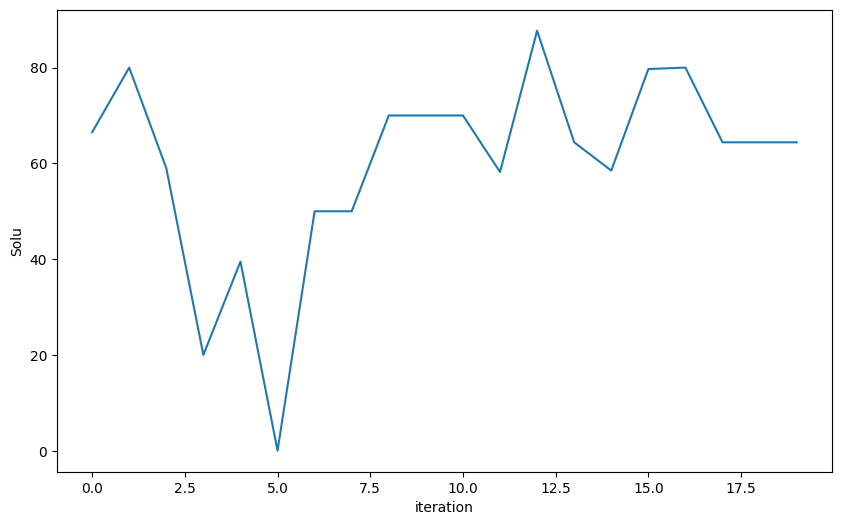

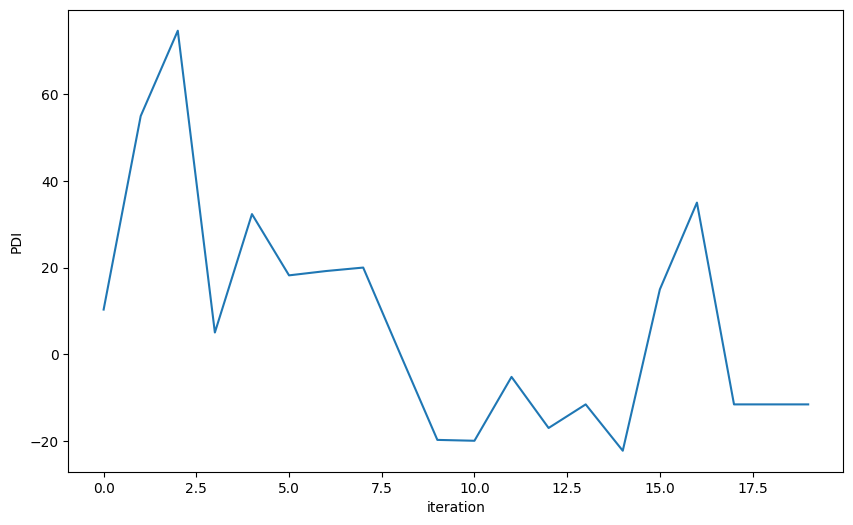

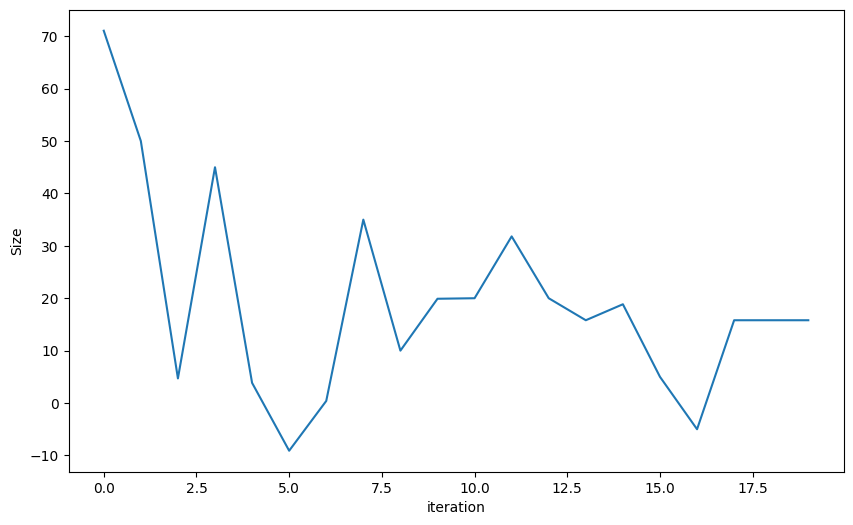

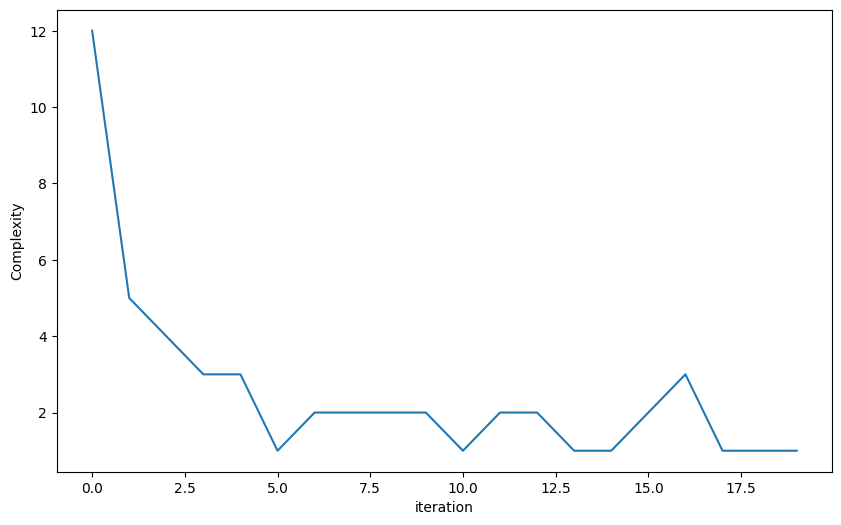

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

for obj in ['Solu', 'PDI', 'Size', 'Complexity']:

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=final_df, x='iteration', y=obj)
